In [23]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Import dataset

In [24]:
turbine = 'T11'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [25]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

,turbine_id,grd_prod_pwr_min,gen_rpm_avg,blds_pitchangle_max,grd_prod_pwr_avg,amb_winddir_abs_avg,gen_bear_temp_avg,amb_windspeed_min,grd_prod_reactpwr_max,grd_prod_curphse1_avg,...,grd_prod_voltphse1_avg,grd_prod_psblepwr_std,grd_prod_cosphi_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,rtr_rpm_std,component,remarks,failure
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T11,154.1,1270.9,0.9,246.1,199.1,42.0,2.6,-72.5,197.0,...,400.7,51.7,0.9,0.0,41059.0,0.0,0.2,None,None,0
2016-01-01 00:10:00,T11,191.3,1303.6,-0.8,304.7,207.5,43.0,1.7,-76.8,245.0,...,400.4,54.8,1.0,0.0,50808.0,0.0,0.4,None,None,0
2016-01-01 00:20:00,T11,211.3,1344.3,-1.3,364.2,190.5,43.0,1.5,-33.7,292.3,...,399.8,50.2,1.0,0.0,60667.0,0.0,0.2,None,None,0
2016-01-01 00:30:00,T11,316.5,1377.5,0.3,465.0,214.6,43.0,2.7,-88.7,374.6,...,399.6,60.1,1.0,0.0,77486.0,0.0,0.4,None,None,0
2016-01-01 00:40:00,T11,204.3,1396.2,-1.0,404.6,212.1,43.0,1.7,-91.1,327.7,...,398.8,99.0,1.0,0.0,67378.0,0.0,0.6,None,None,0


## check number of failures

In [26]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


,turbine_id,component,remarks,failure
timestamp,,,,
2016-03-03 19:00:00,T11,GENERATOR,Electric circuit error in generator,1
2016-10-17 17:44:00,T11,HYDRAULIC_GROUP,Hydraulic group error in the brake circuit,1
2017-04-26 18:06:00,T11,HYDRAULIC_GROUP,Hydraulic group error in the brake circuit,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87251 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   87251 non-null  object 
 1   grd_prod_pwr_min             87248 non-null  float64
 2   gen_rpm_avg                  87248 non-null  float64
 3   blds_pitchangle_max          87248 non-null  float64
 4   grd_prod_pwr_avg             87248 non-null  float64
 5   amb_winddir_abs_avg          87248 non-null  float64
 6   gen_bear_temp_avg            87247 non-null  float64
 7   amb_windspeed_min            87248 non-null  float64
 8   grd_prod_reactpwr_max        87248 non-null  float64
 9   grd_prod_curphse1_avg        87248 non-null  float64
 10  grd_prod_pwr_max             87248 non-null  float64
 11  grd_prod_pwr_std             87248 non-null  float64
 12  blds_pitchangle_min          87248 non-

In [28]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [29]:
datatypes[datatypes['dtypes'] == 'int64']

,dtypes
failure,int64


There is only 3 columns as string

In [30]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()
tags_int = datatypes[datatypes['dtypes'] == 'int64'].index.tolist()


## Check Duplicates

In [31]:
df[df.index.duplicated(keep=False)]

,turbine_id,grd_prod_pwr_min,gen_rpm_avg,blds_pitchangle_max,grd_prod_pwr_avg,amb_winddir_abs_avg,gen_bear_temp_avg,amb_windspeed_min,grd_prod_reactpwr_max,grd_prod_curphse1_avg,...,grd_prod_voltphse1_avg,grd_prod_psblepwr_std,grd_prod_cosphi_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,rtr_rpm_std,component,remarks,failure
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-30 02:00:00,T11,1198.1,1672.5,9.6,1875.2,93.6,68.0,1.9,-211.5,1570.8,...,400.1,206.3,1.0,0.0,312325.0,0.0,0.2,None,None,0
2016-10-30 02:00:00,T11,1130.1,1671.0,5.6,1806.9,93.0,73.0,2.0,-198.5,1517.1,...,398.3,195.0,1.0,0.0,301192.0,0.0,0.1,None,None,0
2016-10-30 02:10:00,T11,1233.7,1675.8,7.6,1870.3,112.9,73.0,3.8,-201.1,1567.2,...,399.3,185.9,1.0,0.0,311628.0,0.0,0.2,None,None,0
2016-10-30 02:10:00,T11,1452.5,1676.2,10.5,1944.2,106.1,69.0,4.1,-217.2,1633.7,...,398.3,121.8,1.0,0.0,324005.0,0.0,0.2,None,None,0
2016-10-30 02:20:00,T11,1331.6,1669.9,7.3,1826.6,93.7,74.0,3.0,-204.6,1526.6,...,400.6,199.4,1.0,0.0,304970.0,0.0,0.2,None,None,0
2016-10-30 02:20:00,T11,1364.3,1677.5,6.4,1948.8,82.0,70.0,3.3,-217.4,1638.9,...,398.1,121.2,1.0,0.0,324852.0,0.0,0.2,None,None,0
2016-10-30 02:30:00,T11,1914.3,1681.2,8.8,1999.9,110.5,71.0,3.1,-217.0,1681.1,...,398.2,7.0,1.0,0.0,333279.0,0.0,0.1,None,None,0
2016-10-30 02:30:00,T11,1096.0,1667.9,5.1,1776.9,99.3,74.0,2.7,-201.6,1485.5,...,400.1,252.5,1.0,0.0,296456.0,0.0,0.2,None,None,0
2016-10-30 02:40:00,T11,963.9,1670.0,7.0,1769.4,106.0,72.0,4.1,-206.6,1489.5,...,397.9,267.1,1.0,0.0,294792.0,0.0,0.2,None,None,0


In [32]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (87251, 85)
after (87245, 85)


## Splitting Training and Test Set

In [33]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [34]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                  0.999966
remarks                    0.999966
gen_bear_temp_avg          0.000046
grd_prod_cosphi_avg        0.000046
rtr_rpm_std                0.000034
                             ...   
grd_busbar_temp_avg        0.000034
grd_prod_psblepwr_min      0.000034
hvtrafo_phase2_temp_avg    0.000034
turbine_id                 0.000000
failure                    0.000000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [35]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             2
gen_rpm_avg                  2
blds_pitchangle_max          2
grd_prod_pwr_avg             2
amb_winddir_abs_avg          2
                            ..
grd_prod_cosphi_avg          2
prod_latestavg_actpwrgen0    2
prod_latestavg_actpwrgen1    2
prod_latestavg_actpwrgen2    2
rtr_rpm_std                  2
Length: 81, dtype: int64

In [36]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [37]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [38]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min          0.0
nac_temp_avg              0.0
gen_bear2_temp_avg        0.0
gen_rpm_max               0.0
amb_windspeed_est_avg     0.0
                         ... 
amb_windspeed_avg         0.0
grd_prod_voltphse3_avg    0.0
grd_busbar_temp_avg       0.0
grd_prod_psblepwr_min     0.0
rtr_rpm_std               0.0
Length: 81, dtype: float64

In [39]:
training_set_float = training_set[tags_float].copy()

## Check for tags with high correlation and drop one of them - VIF

In [40]:
vif_saved = True

if vif_saved == True:
    pass
else:
    print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    start_time = time.time()

    # Scaling first to ease the calculations
    scaler = StandardScaler()

    X = training_set_float.copy()
    X_scaled = scaler.fit_transform(X)

    # Keep DataFrame indexes ---------------------------------------------------------
    X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

    vif_factor_threshold = 5
    iter = 1
    span_tags_to_remove = 1

    while iter > 0:
        print(f'\r{len(X_scaled.columns)}', end="")

        vif = pd.DataFrame()
        vif["features"] = X_scaled.columns
        vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
        vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

        if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
            iter = 0
        else:
            tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
            cols = X_scaled.columns.tolist()
            for t in tag_name:
                cols.remove(t)
            X_scaled = X_scaled[cols].copy()

    execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
    print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    print(f'duration: {execution}')

    display(vif_high)

In [41]:
# vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
# vif_high.to_json(vif_filename)

In [42]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high = pd.read_json(vif_filename)
vif_high

,features,VIF Factor
14,amb_windspeed_max,4.317929
4,amb_windspeed_std,4.216420
16,blds_pitchangle_std,4.030760
17,gear_oil_temp_avg,3.867302
20,rtr_rpm_std,3.730441
10,blds_pitchangle_avg,3.250593
12,hyd_oil_temp_avg,3.003931
18,grd_prod_cosphi_avg,2.946206
9,nac_direction_avg,2.944322
0,amb_winddir_abs_avg,2.815782


In [43]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_float_red = training_set_float[tags_float_red]
training_set_float_red

Frmo 80 columns noe we have 21


,amb_windspeed_max,amb_windspeed_std,blds_pitchangle_std,gear_oil_temp_avg,rtr_rpm_std,blds_pitchangle_avg,hyd_oil_temp_avg,grd_prod_cosphi_avg,nac_direction_avg,amb_winddir_abs_avg,...,prod_latestavg_reactpwrgen0,amb_windspeed_min,grd_prod_reactpwr_min,cont_hub_temp_avg,grd_prod_psbleind_std,grd_prod_voltphse2_avg,amb_winddir_relative_avg,grd_prod_freq_avg,prod_latestavg_reactpwrgen2,prod_latestavg_actpwrgen2
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,8.6,0.7,0.3,48.0,0.2,-1.4,30.0,0.9,206.9,199.1,...,0.0,2.6,-100.1,28.0,56.5,398.2,-7.8,50.0,0.0,0.0
2016-01-01 00:10:00,11.1,0.9,0.4,48.0,0.4,-1.7,30.0,1.0,206.9,207.5,...,0.0,1.7,-102.0,28.0,5.8,398.2,0.6,50.0,0.0,0.0
2016-01-01 00:20:00,9.9,0.8,0.2,49.0,0.2,-1.9,30.0,1.0,206.9,190.5,...,0.0,1.5,-108.1,28.0,0.2,397.7,-16.5,50.0,0.0,0.0
2016-01-01 00:30:00,9.4,0.8,0.2,49.0,0.4,-2.0,30.0,1.0,206.9,214.6,...,0.0,2.7,-105.1,28.0,0.0,397.3,7.6,50.0,0.0,0.0
2016-01-01 00:40:00,11.6,0.9,0.3,50.0,0.6,-2.0,30.0,1.0,206.9,212.1,...,0.0,1.7,-106.1,28.0,1.7,396.7,5.2,50.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,12.4,1.1,0.1,54.0,0.4,-2.2,26.0,1.0,102.4,101.7,...,0.0,3.0,-125.2,23.0,0.0,396.1,-0.8,50.0,0.0,0.0
2016-12-31 23:20:00,19.4,1.3,0.2,55.0,0.4,-2.2,25.0,1.0,102.4,122.1,...,0.0,3.7,-131.1,23.0,0.0,395.8,19.7,50.0,0.0,0.0
2016-12-31 23:30:00,17.6,1.2,0.1,55.0,0.4,-2.2,25.0,1.0,102.4,89.8,...,0.0,3.7,-125.0,23.0,0.0,396.2,-12.6,50.0,0.0,0.0


### Check for low variance 

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_float_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_float_red = training_set_float_red[tags_float_red]
print(training_set_float_red.shape)
training_set_float_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_freq_avg               0.012
grd_prod_cosphi_avg             0.169
amb_windspeed_std               0.768
rtr_rpm_std                     0.969
amb_windspeed_min               1.007
grd_prod_voltphse2_avg          1.525
blds_pitchangle_std             4.089
cont_hub_temp_avg               5.377
gear_oil_temp_avg               6.411
amb_windspeed_max               7.368
hyd_oil_temp_avg                7.426
blds_pitchangle_avg            13.360
amb_winddir_relative_avg       31.175
nac_direction_avg              94.755
amb_winddir_abs_avg            95.079
grd_prod_psbleind_std          97.024
grd_prod_pwr_std              115.840
grd_prod_reactpwr_min         154.341
prod_latestavg_reactpwrgen0   416.055
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_freq_avg', 'grd_prod_cosphi_avg', 'amb_windspeed_std',
       'rtr_rpm_std'],
      dtype='object')

(52442, 15)


,amb_windspeed_min,grd_prod_voltphse2_avg,blds_pitchangle_std,cont_hub_temp_avg,gear_oil_temp_avg,amb_windspeed_max,hyd_oil_temp_avg,blds_pitchangle_avg,amb_winddir_relative_avg,nac_direction_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_pwr_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2.600,398.200,0.300,28.000,48.000,8.600,30.000,-1.400,-7.800,206.900,199.100,56.500,51.800,-100.100,0.000
2016-01-01 00:10:00,1.700,398.200,0.400,28.000,48.000,11.100,30.000,-1.700,0.600,206.900,207.500,5.800,54.400,-102.000,0.000
2016-01-01 00:20:00,1.500,397.700,0.200,28.000,49.000,9.900,30.000,-1.900,-16.500,206.900,190.500,0.200,49.700,-108.100,0.000
2016-01-01 00:30:00,2.700,397.300,0.200,28.000,49.000,9.400,30.000,-2.000,7.600,206.900,214.600,0.000,59.500,-105.100,0.000
2016-01-01 00:40:00,1.700,396.700,0.300,28.000,50.000,11.600,30.000,-2.000,5.200,206.900,212.100,1.700,98.600,-106.100,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,3.000,396.100,0.100,23.000,54.000,12.400,26.000,-2.200,-0.800,102.400,101.700,0.000,153.900,-125.200,0.000
2016-12-31 23:20:00,3.700,395.800,0.200,23.000,55.000,19.400,25.000,-2.200,19.700,102.400,122.100,0.000,157.000,-131.100,0.000
2016-12-31 23:30:00,3.700,396.200,0.100,23.000,55.000,17.600,25.000,-2.200,-12.600,102.400,89.800,0.000,151.500,-125.000,0.000


### Check Different Types of Correlations

In [45]:
# Correlation

def plot_corr(df, method='pearson', additional_filename = '' ):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')
    filename = f'correlation_heatmap_{method}_{additional_filename}.png'
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
    plt.close(f)
    print(f' ok {filename}')
    
plot_corr(training_set_float_red, 'pearson', '1')
plot_corr(training_set_float_red, 'spearman', '1')


 ok correlation_heatmap_pearson_1.png
 ok correlation_heatmap_spearman_1.png


In [73]:
filename = f'correlation_pairplot.png'
sns.pairplot(training_set_float_red, corner=True)
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print('ok')


ok


In [ ]:
profile = ProfileReport(training_set_float_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.78it/s]

ok


### Drop high correlated variables

In [46]:


df_float_red = training_set_float_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

while names != []:
    corr = df_float_red.corr(method='spearman')
    names = []

    for name, values in corr.iteritems():
        high_corr = values[values.abs() > 0.7]
        cols = high_corr.index.tolist()
        cols.remove(name)
        if cols != []:
            names = names + [name]

    if names != []:
        corr_sum = corr.abs().sum(axis=0)
        high_corr_sum = corr_sum[names]
        drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

        df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')

# for name, values in training_set_red[x.index].iteritems():
#     pd.DataFrame(values).plot(title=name, style='.')
#     plt.show()

before (52442, 15)
after (52442, 10)


In [47]:
training_set_float_red = df_float_red.copy()
training_set_float_red

,amb_windspeed_min,grd_prod_voltphse2_avg,cont_hub_temp_avg,amb_windspeed_max,blds_pitchangle_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0
timestamp,,,,,,,,,,
2016-01-01 00:00:00,2.600,398.200,28.000,8.600,-1.400,-7.800,199.100,56.500,-100.100,0.000
2016-01-01 00:10:00,1.700,398.200,28.000,11.100,-1.700,0.600,207.500,5.800,-102.000,0.000
2016-01-01 00:20:00,1.500,397.700,28.000,9.900,-1.900,-16.500,190.500,0.200,-108.100,0.000
2016-01-01 00:30:00,2.700,397.300,28.000,9.400,-2.000,7.600,214.600,0.000,-105.100,0.000
2016-01-01 00:40:00,1.700,396.700,28.000,11.600,-2.000,5.200,212.100,1.700,-106.100,0.000
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,3.000,396.100,23.000,12.400,-2.200,-0.800,101.700,0.000,-125.200,0.000
2016-12-31 23:20:00,3.700,395.800,23.000,19.400,-2.200,19.700,122.100,0.000,-131.100,0.000
2016-12-31 23:30:00,3.700,396.200,23.000,17.600,-2.200,-12.600,89.800,0.000,-125.000,0.000


In [76]:
# Correlation
    
plot_corr(training_set_float_red, 'pearson', '2')
plot_corr(training_set_float_red, 'spearman', '2')

 ok correlation_heatmap_pearson_2.png
 ok correlation_heatmap_spearman_2.png


## Temporal Analyses

In [94]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses.png'

plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
for e,tag in enumerate(training_set_float_red.columns):
    tmp = training_set_float_red[tag].copy()
    
    plt.subplot(training_set_float_red.shape[1],1,e+1)
    plt.title(f'{tag}')
    tmp.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    
plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print(f' ok {filename}')


 ok temporal_analyses.png


In [110]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses_alarm'

for failure in failures_datetime:
    failure_datetime_init = failure - timedelta(days=boundaries_days)
    failure_datetime_end = failure + timedelta(days=boundaries_days)
    
    tmp_alarm_period = training_set_float_red[failure_datetime_init:failure_datetime_end].copy()

    plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
    
    for e,tag in enumerate(training_set_float_red.columns):
        tmp = tmp_alarm_period[tag].copy()
        
        plt.subplot(training_set_float_red.shape[1],1,e+1)
        plt.title(f'{tag}')
        tmp.plot(zorder=0)
        plt.vlines(failure, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()

    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}_{str(failure.date())}.png')
    plt.close()
    print(f' ok {filename}')


 ok temporal_analyses_alarm
 ok temporal_analyses_alarm


# Shrink training_set dimension

In [48]:
red_tags_float = training_set_float_red.columns.tolist()
cols = tags_int+ red_tags_float+tags_str
training_set = training_set[cols].copy()
training_set.head()



,failure,amb_windspeed_min,grd_prod_voltphse2_avg,cont_hub_temp_avg,amb_windspeed_max,blds_pitchangle_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0,turbine_id,component,remarks
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,2.600,398.200,28.000,8.600,-1.400,-7.800,199.100,56.500,-100.100,0.000,T11,None,None
2016-01-01 00:10:00,0,1.700,398.200,28.000,11.100,-1.700,0.600,207.500,5.800,-102.000,0.000,T11,None,None
2016-01-01 00:20:00,0,1.500,397.700,28.000,9.900,-1.900,-16.500,190.500,0.200,-108.100,0.000,T11,None,None
2016-01-01 00:30:00,0,2.700,397.300,28.000,9.400,-2.000,7.600,214.600,0.000,-105.100,0.000,T11,None,None
2016-01-01 00:40:00,0,1.700,396.700,28.000,11.600,-2.000,5.200,212.100,1.700,-106.100,0.000,T11,None,None


## Numerical Variable Distribution within failure

### Considering the data 48 hrs before and after failure

In [119]:
# boundaries_days = 2
# training_set['prob_failure'] = 0
# failures_datetime = training_set[training_set['failure'] == 1].index

# for failure in failures_datetime:
#     failure_datetime_init = failure - timedelta(days=boundaries_days)
#     len_ = len(training_set[failure_datetime_init:failure].index)
#     probs = np.linspace(start=0.001, stop=1, num=len_)
#     training_set.loc[failure_datetime_init:failure, 'prob_failure'] = probs

# training_set['non_zero_prob'] = 0
# training_set.loc[training_set['prob_failure'] > 0, 'non_zero_prob'] = 1


In [121]:
def input_prob_failure(df, boundaries_days = 2):
    '''
    
    Input prob_failure columns and non_zero_prob column
    
    '''
    
    df['prob_failure'] = 0
    failures_datetime = df[df['failure'] == 1].index

    for failure in failures_datetime:
        failure_datetime_init = failure - timedelta(days=boundaries_days)
        len_ = len(df[failure_datetime_init:failure].index)
        probs = np.linspace(start=0.001, stop=1, num=len_)
        df.loc[failure_datetime_init:failure, 'prob_failure'] = probs
    
    df['non_zero_prob'] = 0
    df.loc[df['prob_failure'] > 0, 'non_zero_prob'] = 1

    
    return df

In [126]:
training_set = input_prob_failure(df=training_set)
failures_datetime = training_set[training_set['failure'] == 1].index


In [ ]:
filename = 'float_tags_distribution'

cols = red_tags_float + ['non_zero_prob']
sns.pairplot(training_set[cols], corner=True, hue='non_zero_prob', kind='hist', diag_kind='kde')
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()


In [114]:

filename = 'histogram_per_variable_failure'

plt.figure(figsize=(20,3*len(red_tags_float)))
e = 1 

# for e,tag in enumerate(red_tags_float):
for tag in red_tags_float:

    # DISTRIBUTION FAILURE AND NON FAILURE
    tmp = training_set[[tag,'non_zero_prob']].copy()
    
    median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
    median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
    std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
    std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
    
    txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
          \n STD nonfailure {std_nonfailure} | failure {std_failure}'''
    
    plt.subplot(len(red_tags_float),2,e)
    plt.title(f'{tag} {txt}')
    sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    plt.tight_layout()
    e += 1
    
    # TAG TEMPORAL ANALISES
    temporal_tag = training_set_float_red[tag].copy()
    
    plt.subplot(len(red_tags_float),2,e)
    plt.title(f'{tag}')
    temporal_tag.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(temporal_tag), ymax=np.max(temporal_tag), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    plt.tight_layout()
    e += 1
            
# plt.show()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()

# sns.kdeplot(data=tmp, x=cols[0], hue='non_zero_prob', common_norm=False)
# sns.distplot(tmp[cols[0]], kde=True, hist = False)
# sns.histplot(data=tmp,x=cols[0], hue='non_zero_prob', kde=True,hist=False,  stat='density',common_norm=False)

# Proportion of Failures for Categorical Variables - there is no categorical explainable variable

In [53]:
print(training_set.shape)
training_set.head()


(52442, 15)


,failure,amb_windspeed_min,grd_prod_voltphse2_avg,cont_hub_temp_avg,amb_windspeed_max,blds_pitchangle_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0,turbine_id,component,remarks,prob_failure
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,2.600,398.200,28.000,8.600,-1.400,-7.800,199.100,56.500,-100.100,0.000,T11,None,None,0.000
2016-01-01 00:10:00,0,1.700,398.200,28.000,11.100,-1.700,0.600,207.500,5.800,-102.000,0.000,T11,None,None,0.000
2016-01-01 00:20:00,0,1.500,397.700,28.000,9.900,-1.900,-16.500,190.500,0.200,-108.100,0.000,T11,None,None,0.000
2016-01-01 00:30:00,0,2.700,397.300,28.000,9.400,-2.000,7.600,214.600,0.000,-105.100,0.000,T11,None,None,0.000
2016-01-01 00:40:00,0,1.700,396.700,28.000,11.600,-2.000,5.200,212.100,1.700,-106.100,0.000,T11,None,None,0.000


# Time between failures

In [54]:
failures_datetime

DatetimeIndex(['2016-03-03 19:00:00', '2016-10-17 17:44:00'], dtype='datetime64[ns]', name='timestamp', freq=None)

# Conclusion

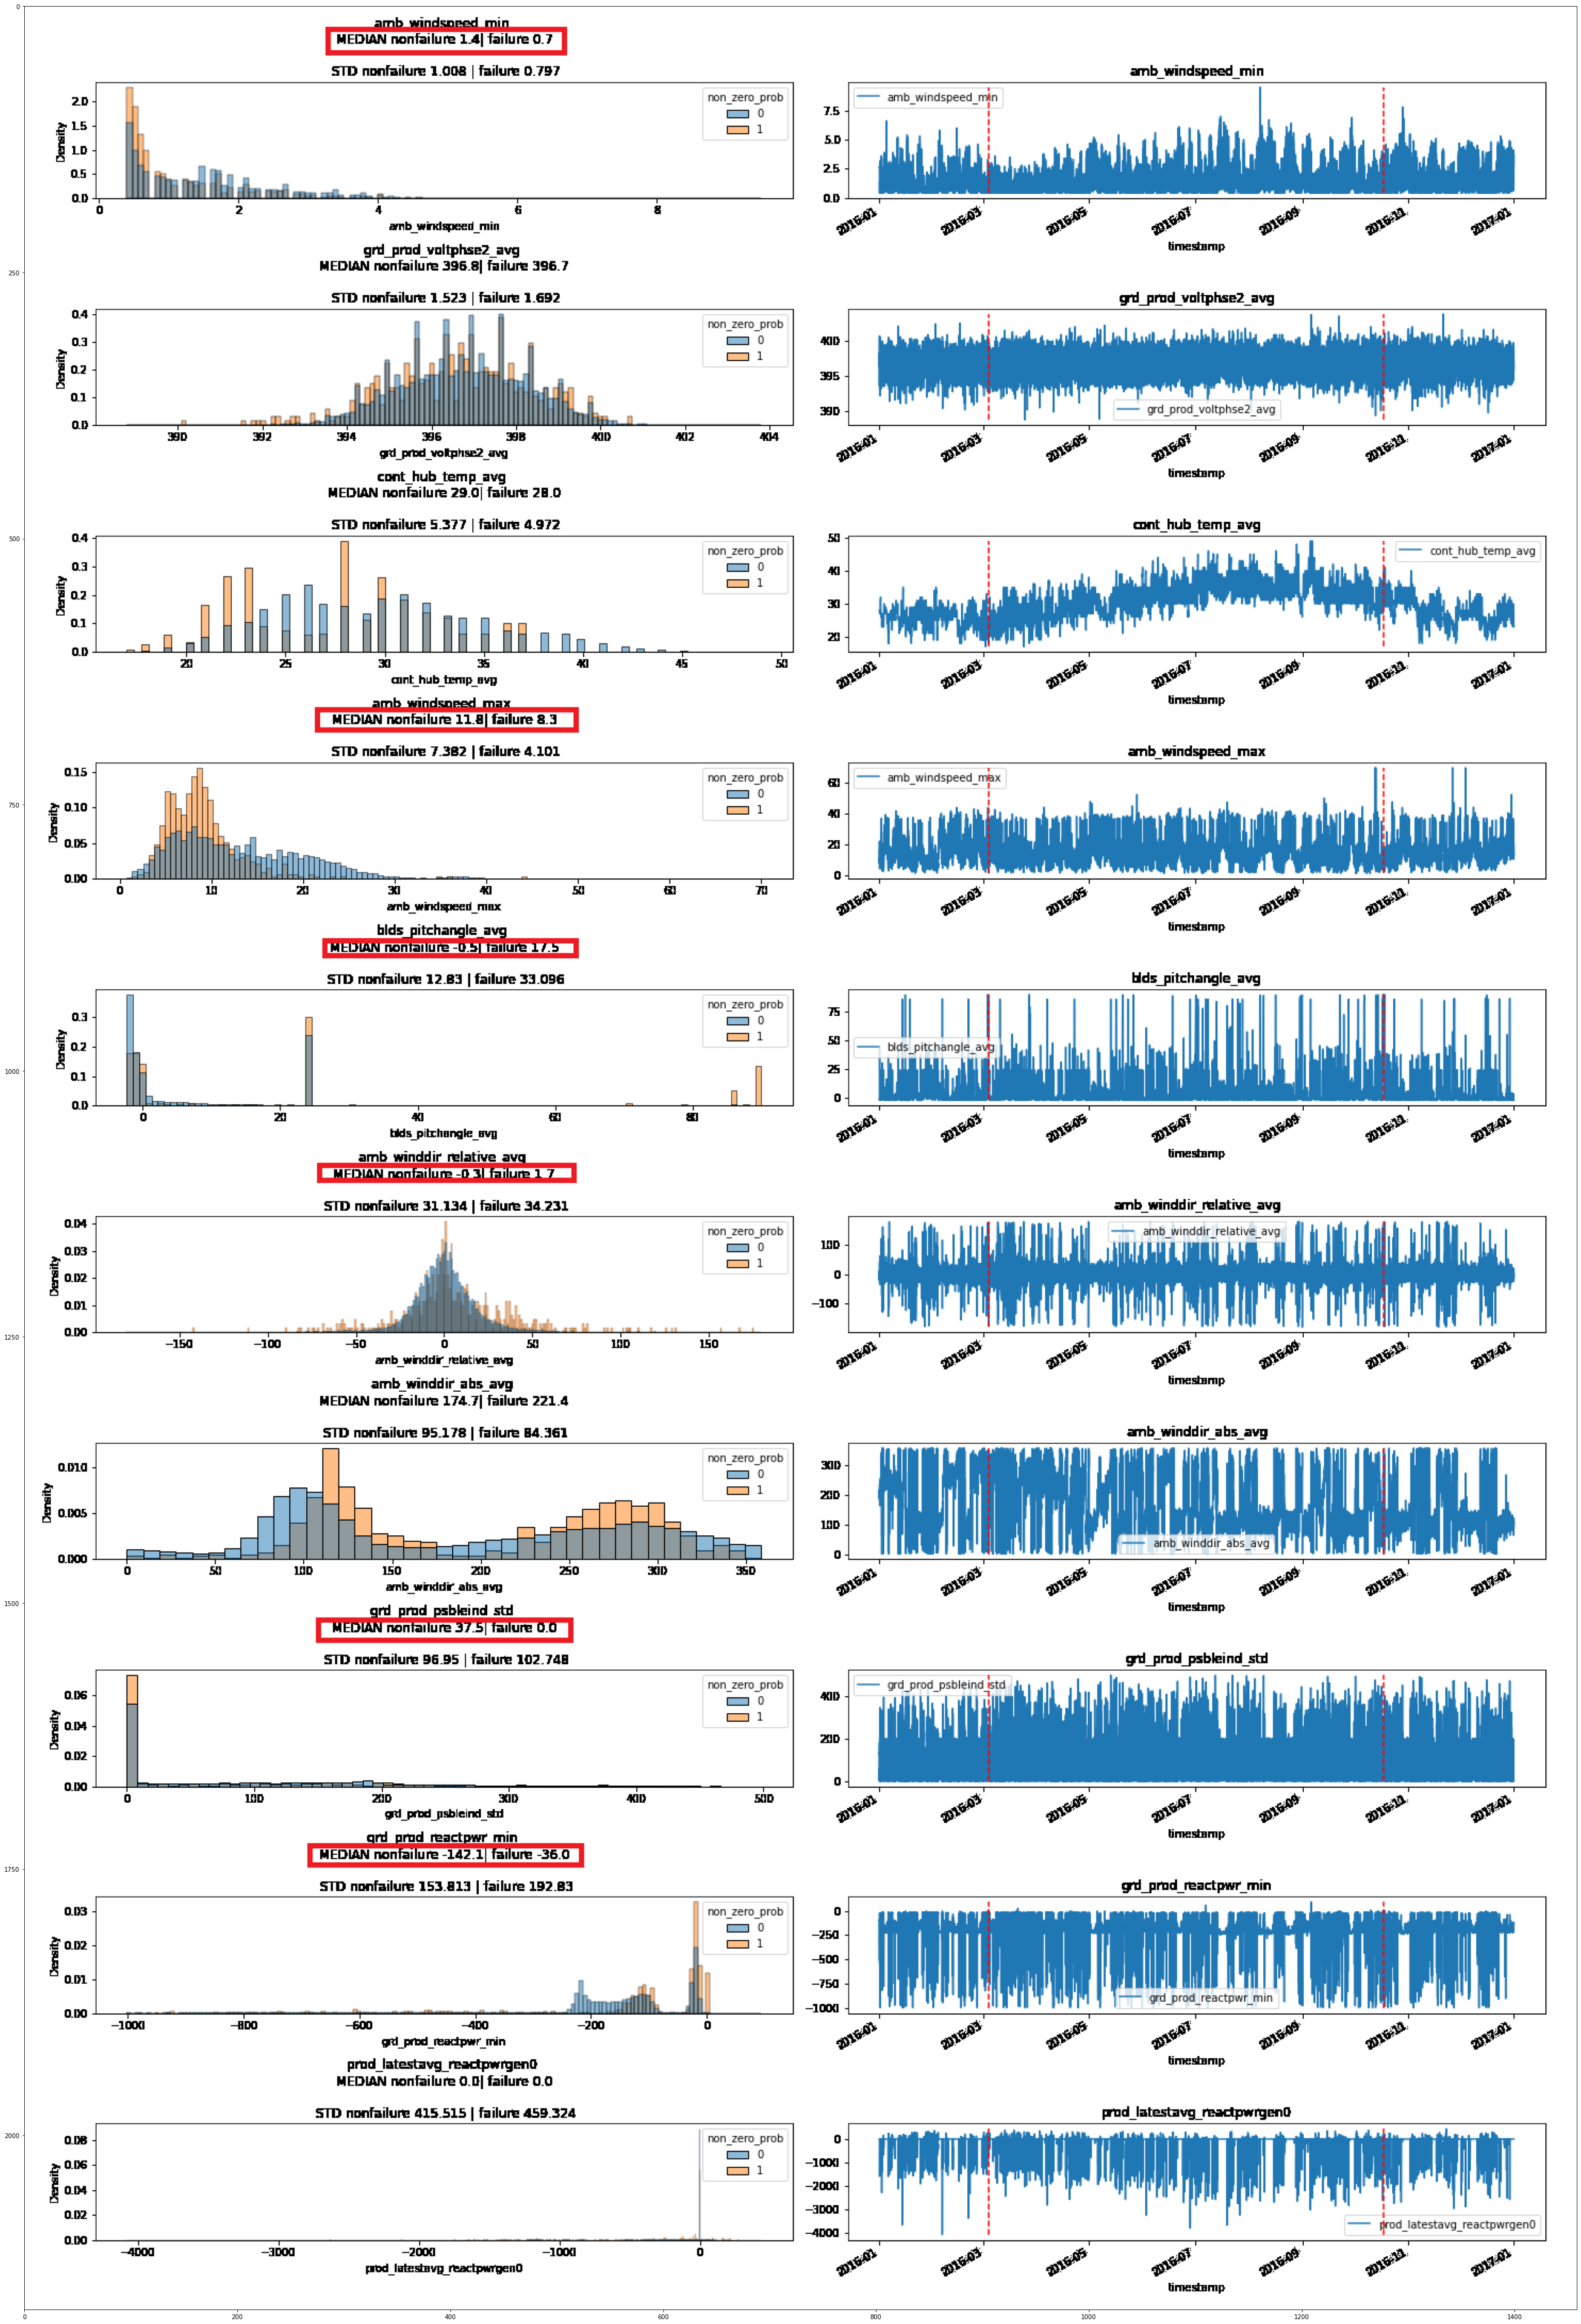

In [116]:

filename = 'analyses_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

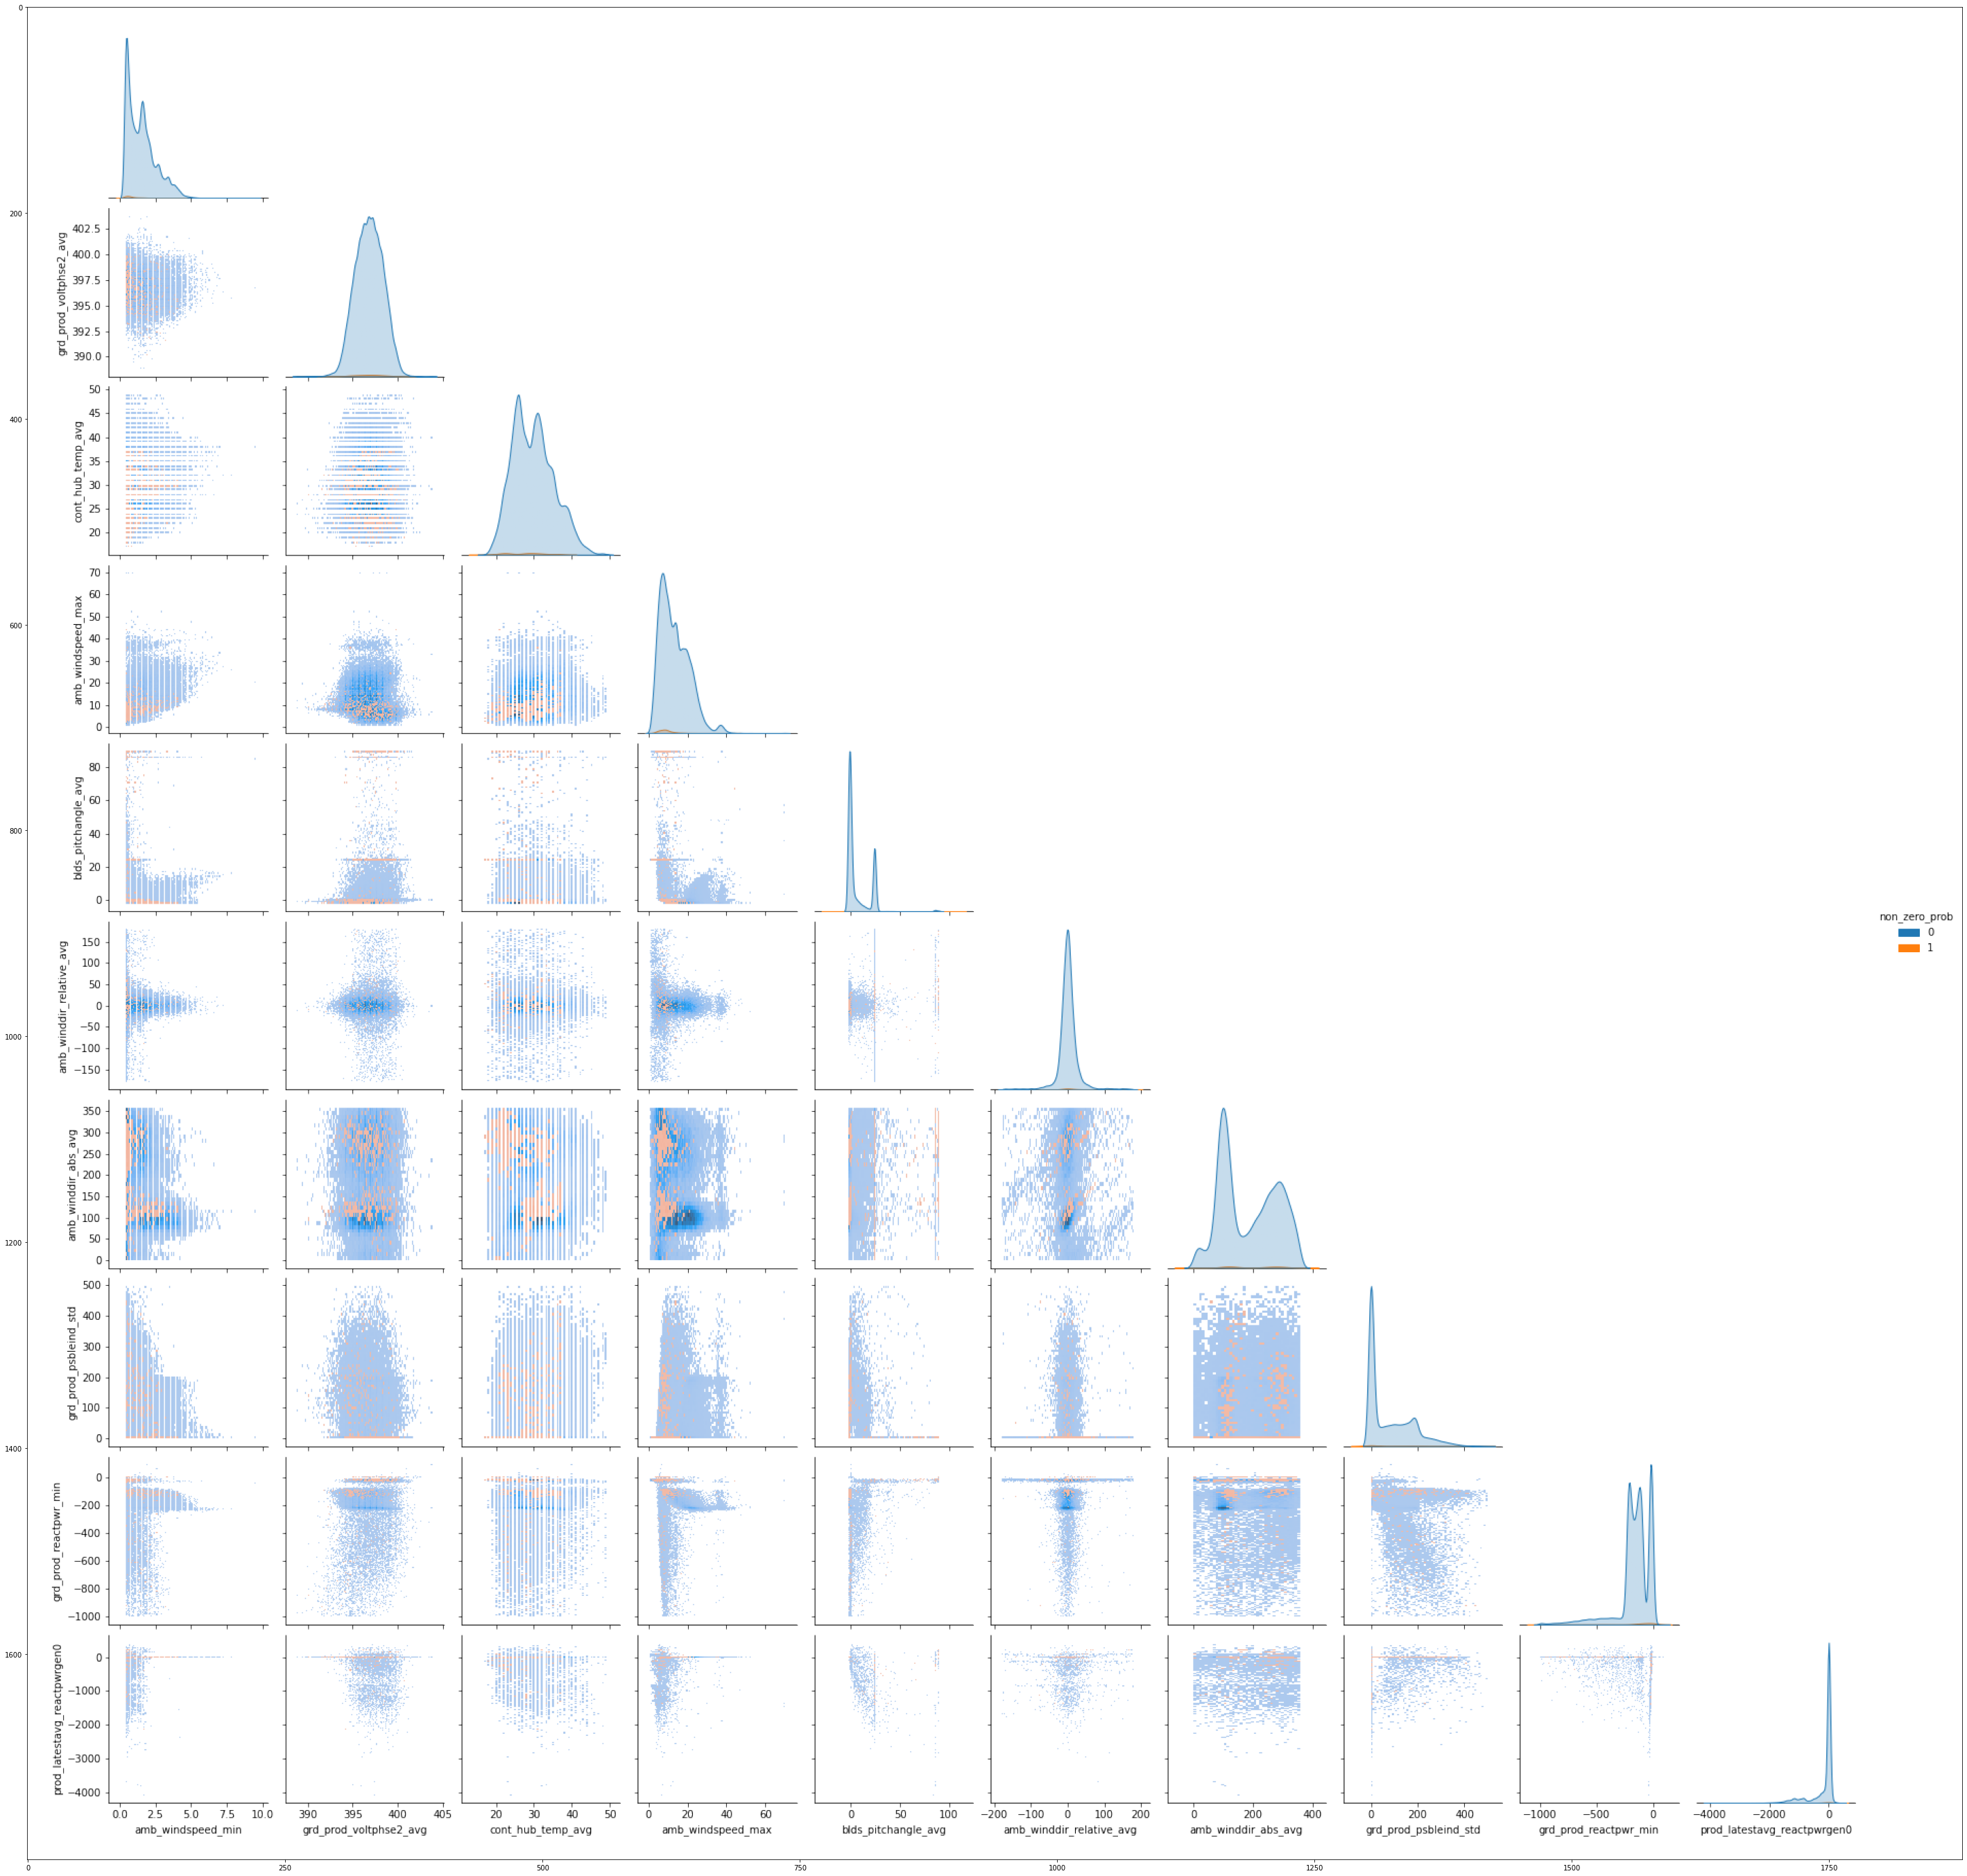

In [ ]:

filename = 'float_tags_distribution'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(50,50))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

# Signals of Pre Failure
- low -> amb_windspeed_min 
- high -> blds_pitchangle_avg
- high -> amb_winddir_relative_avg
- high -> grd_prod_psbleind_std
- high -> grd_prod_reactpwr_min

# Validation

In [127]:
input_prob_failure(df=test_set)


,turbine_id,grd_prod_pwr_min,gen_rpm_avg,blds_pitchangle_max,grd_prod_pwr_avg,amb_winddir_abs_avg,gen_bear_temp_avg,amb_windspeed_min,grd_prod_reactpwr_max,grd_prod_curphse1_avg,...,grd_prod_cosphi_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,rtr_rpm_std,component,remarks,failure,prob_failure,non_zero_prob
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,T11,412.200,1596.900,-0.800,859.800,97.200,41.000,2.400,-121.600,710.000,...,1.000,0.000,143338.000,0.000,0.600,None,None,0,0.000,0
2017-01-01 00:10:00,T11,170.100,1443.700,-1.000,508.000,97.100,41.000,1.700,-108.900,422.000,...,1.000,0.000,84757.000,0.000,0.900,None,None,0,0.000,0
2017-01-01 00:20:00,T11,346.100,1546.000,-1.200,742.700,109.000,41.000,2.100,-117.800,611.200,...,1.000,0.000,123800.000,0.000,0.700,None,None,0,0.000,0
2017-01-01 00:30:00,T11,308.400,1478.200,-0.400,604.100,89.100,41.000,2.400,-124.900,500.500,...,1.000,0.000,100523.000,0.000,0.800,None,None,0,0.000,0
2017-01-01 00:40:00,T11,363.100,1534.800,-1.400,609.000,104.800,40.000,3.400,-104.700,500.800,...,1.000,0.000,101442.000,0.000,0.500,None,None,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:20:00,T11,183.900,1286.100,-1.200,303.800,118.300,43.000,2.800,-80.500,253.800,...,1.000,0.000,50692.000,0.000,0.400,None,None,0,0.000,0
2017-08-31 23:30:00,T11,73.400,1249.800,0.800,149.600,118.000,43.000,2.900,-15.900,142.200,...,0.800,0.000,25023.000,0.000,0.000,None,None,0,0.000,0
2017-08-31 23:40:00,T11,28.300,1248.800,0.500,82.600,113.000,44.000,1.500,212.500,119.200,...,0.600,0.000,13789.000,0.000,0.000,None,None,0,0.000,0
